In [11]:
from matplotlib import pyplot as plt
import numpy as np

In [55]:
def rotMat(alpha, phi):
    rotation = np.array([
    [np.cos(alpha)*np.sin(phi)**2 + np.cos(phi)**2,          
         (1-np.cos(alpha))*np.cos(phi)*np.sin(phi),         
     -np.sin(alpha)*np.sin(phi)],
        
    [    (1-np.cos(alpha))*np.cos(phi)*np.sin(phi),        
       np.cos(alpha)*np.cos(phi)**2+np.sin(phi)**2,         
                        np.sin(alpha)*np.cos(phi)],
        
    [                    np.sin(alpha)*np.sin(phi),                      
                        -np.sin(alpha)*np.cos(phi),                    
                                     np.cos(alpha)]
    ])
    return rotation
  # signal = np.matmul(rotMat(alpha, phi),signal) 
  #   signal[0] = signal[0]*np.exp(-TR/T2)
  #   signal[1] = signal[1]*np.exp(-TR/T2)
  #   signal[2] = M0+(signal[2]-M0)*np.exp(-TR/T1) 
  #   P = np.array([
  #           [ np.cos(beta*TE/TR),  np.sin(beta*TE/TR),   0],
  #           [-np.sin(beta*TE/TR),  np.cos(beta*TE/TR),   0],
  #           [            0,             0,   1]
  #           ])
  #   signal = np.matmul(P,signal)

In [56]:
def dess(M0, alpha, phi, dphi, spoiler, beta, TR, TE, T1, T2, Nr):
    data = np.zeros([Nr,3,3])
    signal = np.asarray([0, 0, M0])
    
    for i in range(Nr):
       
        signal[0] = signal[0]*np.exp(-TR/T2)
        signal[1] = signal[1]*np.exp(-TR/T2)
        signal[2] = M0+(signal[2]-M0)*np.exp(-TR/T1)
        signal = np.matmul(rotMat(alpha/4, phi),signal) 
        data[i,:,0] = signal
        signal = np.matmul(spoiler, signal)
        signal = np.matmul(rotMat(alpha/2, phi),signal) 
        data[i,:,1] = signal
        signal = np.matmul(rotMat(alpha/4, phi),signal) 
        data[i,:,2] = signal
        phi = phi + dphi
        
    
  
    return data


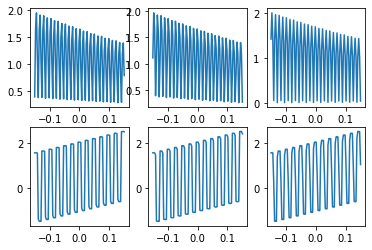

In [61]:
alpha = np.pi/4
size = 100
Nr = size
T1 = 4000
T2 = 2200
# T1 = 790 
# T2 = 92
M0 = 1
sample = size
samples = np.zeros([size,3,2])
TR = 10
TE = TR/2
M0 = 2
phi = 0
dphi = 0.01
f = 3
spoiler = np.asarray([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
beta = np.pi/2 
samples = dess(M0 =M0,alpha = alpha,phi = phi,dphi = dphi, spoiler = spoiler , beta = beta, TR= TR, TE= TE, T1 = T1, T2 = T2, Nr= Nr)
data1 = np.zeros([Nr,1], dtype = complex)
data1.real = samples[:,0,0].reshape(-1,1)
data1.imag = samples[:,1,0].reshape(-1,1)
plt.figure()
plt.subplot(231)
x = np.linspace(-f*np.pi, f*np.pi, Nr)
plt.plot(x/(2*np.pi*TR),np.absolute(data1))
plt.subplot(234)
plt.plot(x/(2*np.pi*TR),np.angle(data1))

data2 = np.zeros([Nr,1], dtype = complex)
data2.real = samples[:,0,1].reshape(-1,1)
data2.imag = samples[:,1,1].reshape(-1,1)
plt.subplot(232)
x = np.linspace(-f*np.pi, f*np.pi, Nr)
plt.plot(x/(2*np.pi*TR),np.absolute(data2))
plt.subplot(235)
plt.plot(x/(2*np.pi*TR),np.angle(data2))


data3 = np.zeros([Nr,1], dtype = complex)
data3.real = samples[:,0,2].reshape(-1,1)
data3.imag = samples[:,1,2].reshape(-1,1)
plt.subplot(233)
x = np.linspace(-f*np.pi, f*np.pi, Nr)
plt.plot(x/(2*np.pi*TR),np.absolute(data3))
plt.subplot(236)
plt.plot(x/(2*np.pi*TR),np.angle(data3))
plt.show()